## UJIIndoorLoc

In [107]:
import pandas as pd

train_records = pd.read_csv("trainingData.csv")
test_records = pd.read_csv("validationData.csv")

In [108]:
attributes = list(train_records.columns)
attributes = attributes[:520]

In [109]:
y_train_long = train_records["LONGITUDE"]
y_train_lat = train_records["LATITUDE"]
y_train_floor = train_records["FLOOR"]
y_train_building = train_records["BUILDINGID"]

y_test_long = test_records["LONGITUDE"]
y_test_lat = test_records["LATITUDE"]
y_test_floor = test_records["FLOOR"]
y_test_building = test_records["BUILDINGID"]

In [110]:
train_records = train_records.as_matrix()
train_records = train_records[:,:520]
test_records = test_records.as_matrix()
test_records = test_records[:,:520]

/home/handabaldeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/handabaldeep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
train_records.shape, test_records.shape

((19937, 520), (1111, 520))

In [112]:
import numpy as np
# check for missing values is any
print(np.isnan(train_records).any())
print(np.isnan(test_records).any())

False
False


### Statistics of the Dataset

In [113]:
statistics = np.zeros((520,4))
for i in range(520):
    statistics[i][0] = np.amin(train_records[:,i])
    statistics[i][1] = np.amax(train_records[:,i])
    statistics[i][2] = np.median(train_records[:,i])
    statistics[i][3] = np.std(train_records[:,i])
print('Structure of Dataset:\n\n',pd.DataFrame(statistics[:12],index=attributes[:12],columns=['Min','Max','Median','SD']))

Structure of Dataset:

           Min    Max  Median         SD
WAP001  -97.0  100.0   100.0   5.866695
WAP002  -90.0  100.0   100.0   5.798011
WAP003  100.0  100.0   100.0   0.000000
WAP004  100.0  100.0   100.0   0.000000
WAP005  -97.0  100.0   100.0   8.615441
WAP006  -98.0  100.0   100.0  22.931315
WAP007  -99.0  100.0   100.0  30.540569
WAP008  -98.0  100.0   100.0  33.009576
WAP009  -98.0  100.0   100.0  30.304324
WAP010  -99.0  100.0   100.0  12.633728
WAP011 -101.0  100.0   100.0  62.181027
WAP012 -101.0  100.0   100.0  62.440600


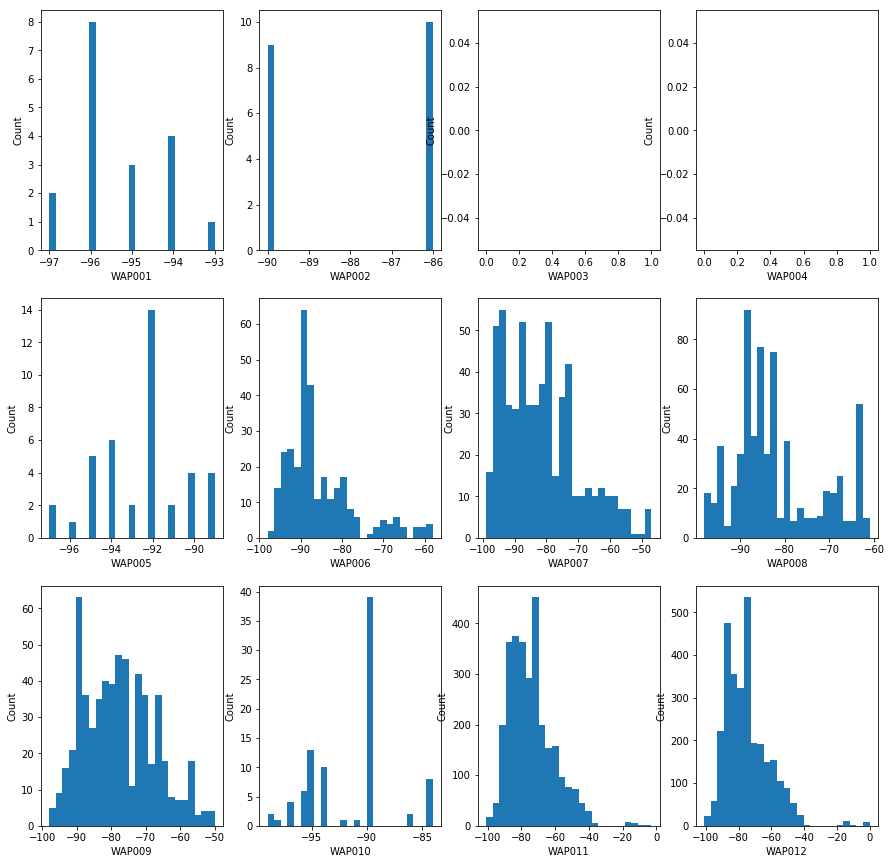

In [114]:
# histogram plot of each input attribute and the output-'Quality'
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 4, figsize=(15, 15))
k = 0

for i in range(3):
    for j in range(4):
        x = list(filter(lambda x : x!=100,train_records[:,k]))
        ax[i,j].hist(x, bins=25)
        ax[i,j].set(xlabel=attributes[k], ylabel="Count")
        k += 1

In [115]:
train_records[train_records==100] = -120
test_records[test_records==100] = -120

In [116]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=5, init='k-means++').fit(train_records)

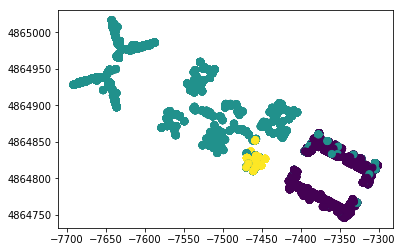

In [117]:
plt.scatter(y_train_long,y_train_lat, s=50, c=kmeans.labels_, cmap='viridis')

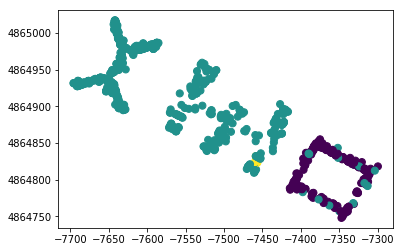

In [118]:
y_kmeans = kmeans.predict(test_records)
plt.scatter(y_test_long,y_test_lat, s=50, c=y_kmeans, cmap='viridis')

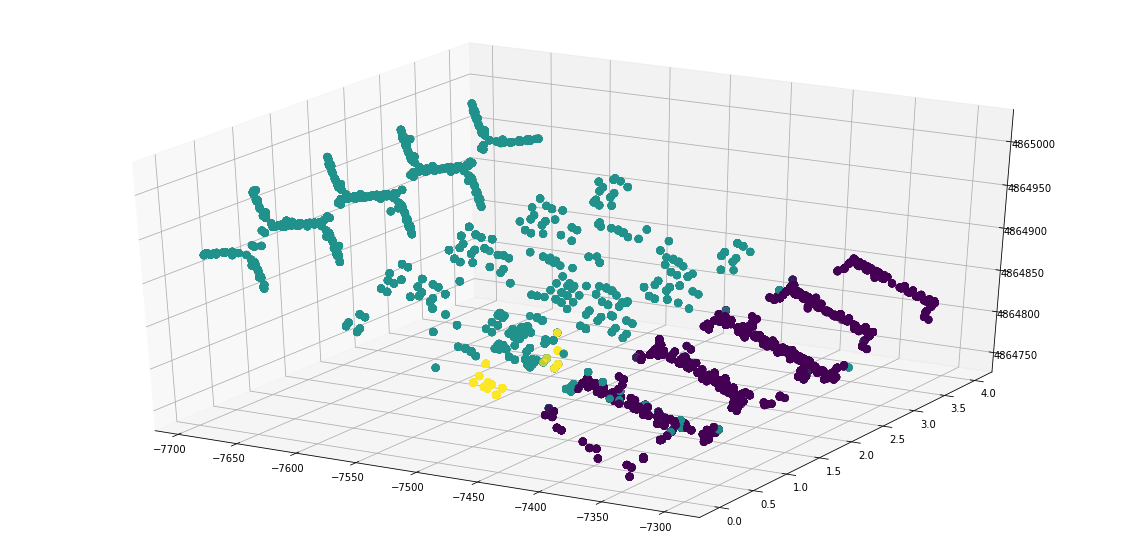

In [119]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_train_long,y_train_floor,y_train_lat, s=50, c=kmeans.labels_, cmap='viridis')

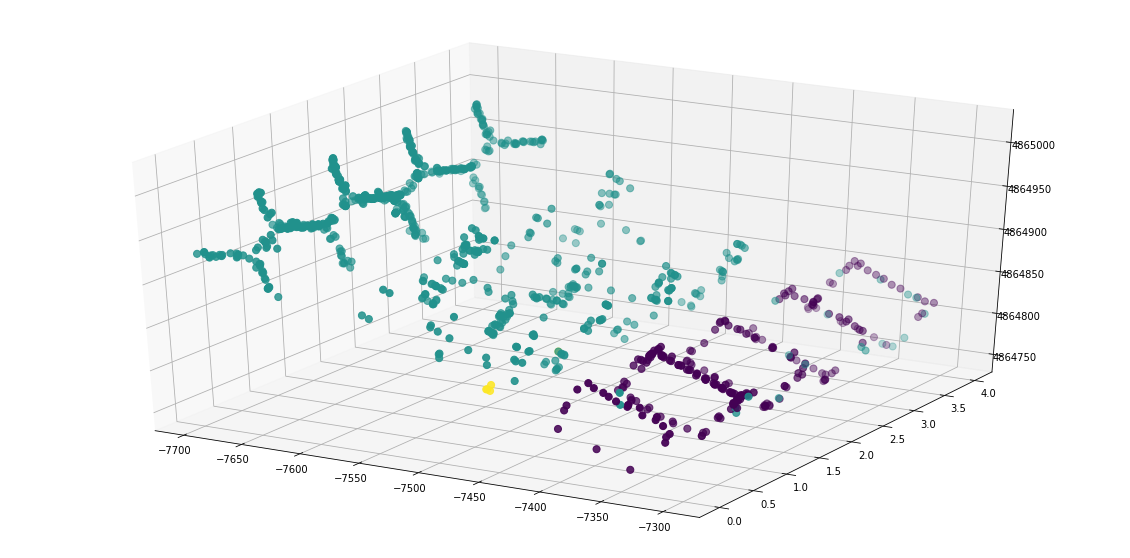

In [120]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_test_long,y_test_floor,y_test_lat, s=50, c=y_kmeans, cmap='viridis')

In [121]:
(train_records.shape,test_records.shape)

((19937, 520), (1111, 520))

In [122]:
for i in range(519,-1,-1):
    if statistics[i][3] == 0:
        #print(i+1)
        attributes.remove(attributes[i])
        train_records = np.delete(train_records,i,1)
        test_records = np.delete(test_records,i,1)

In [123]:
(train_records.shape,test_records.shape)

((19937, 465), (1111, 465))

In [124]:
statistics = np.zeros((465,4))
for i in range(465):
    statistics[i][0] = np.amin(train_records[:,i])
    statistics[i][1] = np.amax(train_records[:,i])
    statistics[i][2] = np.median(train_records[:,i])
    statistics[i][3] = np.std(train_records[:,i])
print('Structure of Dataset:\n\n',pd.DataFrame(statistics[:12],index=attributes[:12],columns=['Min','Max','Median','SD']))

Structure of Dataset:

           Min   Max  Median         SD
WAP001 -120.0 -93.0  -120.0   0.741578
WAP002 -120.0 -86.0  -120.0   0.992557
WAP005 -120.0 -89.0  -120.0   1.233090
WAP006 -120.0 -58.0  -120.0   4.349432
WAP007 -120.0 -47.0  -120.0   6.724253
WAP008 -120.0 -61.0  -120.0   7.111644
WAP009 -120.0 -50.0  -120.0   7.396048
WAP010 -120.0 -84.0  -120.0   1.886089
WAP011 -120.0  -3.0  -120.0  16.999700
WAP012 -120.0   0.0  -120.0  17.056864
WAP013 -120.0 -40.0  -120.0  14.284569
WAP014 -120.0 -40.0  -120.0  14.192663


In [125]:
from sklearn.neighbors import KNeighborsRegressor
knn_long = KNeighborsRegressor(n_neighbors=4)
knn_long.fit(train_records, y_train_long)
y_pred_long = knn_long.predict(test_records)

In [126]:
knn_lat = KNeighborsRegressor(n_neighbors=4)
knn_lat.fit(train_records, y_train_lat)
y_pred_lat = knn_lat.predict(test_records)

In [127]:
dist = ((y_pred_long-y_test_long)**2 + (y_pred_lat-y_test_lat)**2)**0.5
error_1 = sum(dist)
print(error_1)

11517.564449385894


Text(0, 0.5, 'Probability Distribution')

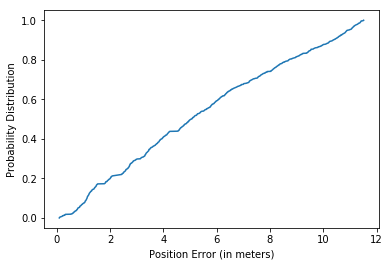

In [128]:
cs = np.cumsum(dist)
plt.plot(cs/1000,cs.index/1110)
plt.xlabel("Position Error (in meters)")
plt.ylabel("Probability Distribution")

In [99]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
error_val = [error_1] #to store rmse values for different k
for k in range(5,301,5):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_records, y_train_lat)
    y_pred_lat=model.predict(test_records)
    model.fit(train_records, y_train_long)
    y_pred_long=model.predict(test_records)
    error = ((y_pred_long-y_test_long)**2 + (y_pred_lat-y_test_lat)**2)**0.5
    err = sum(error)
    error_val.append(err/1000) #store rmse values
    print('RMSE value for k= ' , k , 'is:', err)


RMSE value for k=  5 is: 11331.813968432134
RMSE value for k=  10 is: 11563.784167275235
RMSE value for k=  15 is: 11625.133615078568
RMSE value for k=  20 is: 11784.527109134538
RMSE value for k=  25 is: 11966.19568287834
RMSE value for k=  30 is: 12356.79951927679
RMSE value for k=  35 is: 12519.54781368996
RMSE value for k=  40 is: 12838.859776660878
RMSE value for k=  45 is: 13114.381018329756
RMSE value for k=  50 is: 13320.970283754508
RMSE value for k=  55 is: 13640.132398752845
RMSE value for k=  60 is: 13769.700093949275
RMSE value for k=  65 is: 13963.323184605915
RMSE value for k=  70 is: 14248.049047410186
RMSE value for k=  75 is: 14436.712431068481
RMSE value for k=  80 is: 14718.466954659794
RMSE value for k=  85 is: 15008.774369527462
RMSE value for k=  90 is: 15295.764575046867
RMSE value for k=  95 is: 15475.888889037238
RMSE value for k=  100 is: 15609.577442222737
RMSE value for k=  105 is: 15791.614184034494
RMSE value for k=  110 is: 16005.430339091072
RMSE value 

In [101]:
plt.plot(range(0,301,5),error_val/1000)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

5413272460.5595


Text(0, 0.5, 'Probability Distribution')

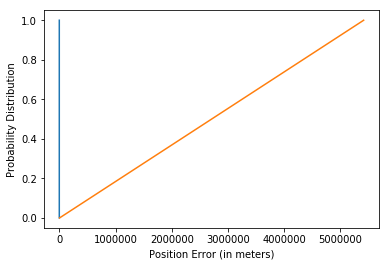

In [129]:
from sklearn.linear_model import LinearRegression
lr_lat = LinearRegression().fit(train_records, y_train_lat)
y_pred_lat= lr_lat.predict(test_records)
lr_long = LinearRegression().fit(train_records, y_train_long)
y_pred_lat= lr_long.predict(test_records)
error = ((y_pred_long-y_test_long)**2 + (y_pred_lat-y_test_lat)**2)**0.5
print(sum(error))
cs2 = np.cumsum(error)
plt.plot(cs/1000,cs.index/1110)
plt.plot(cs2/1000,cs2.index/1110)
plt.xlabel("Position Error (in meters)")
plt.ylabel("Probability Distribution")

11331.813968432134
22380.778484107097


Text(0, 0.5, 'Probability Distribution')

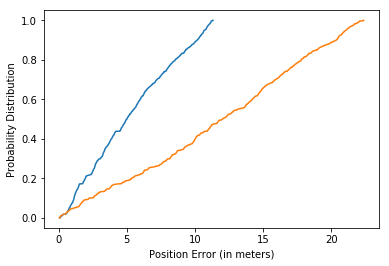

In [132]:
model_5 = KNeighborsRegressor(n_neighbors=5)
model_5.fit(train_records, y_train_lat)
y_pred_lat=model_5.predict(test_records)
model_5.fit(train_records, y_train_long)
y_pred_long=model_5.predict(test_records)
error_5 = ((y_pred_long-y_test_long)**2 + (y_pred_lat-y_test_lat)**2)**0.5
print(sum(error_5))
cs_5 = np.cumsum(error_5)
model_300 = KNeighborsRegressor(n_neighbors=300)
model_300.fit(train_records, y_train_lat)
y_pred_lat=model_300.predict(test_records)
model_300.fit(train_records, y_train_long)
y_pred_long=model_300.predict(test_records)
error_300 = ((y_pred_long-y_test_long)**2 + (y_pred_lat-y_test_lat)**2)**0.5
print(sum(error_300))
cs_300 = np.cumsum(error_300)
plt.plot(cs_5/1000,cs_5.index/1110)
plt.plot(cs_300/1000,cs_300.index/1110)
plt.xlabel("Position Error (in meters)")
plt.ylabel("Probability Distribution")